# AUTHOR : SHIVANI JAISWAL

### INTERN IN SPARK OF FOUNDATAION   #GRIPNOV202  # tsf 
  

### TASK 1 : PREDICT THE PERCENTAGE GAINED BY STUDENTS WITH RESPECT TO HOURS OF STUDY AND SCORE THEY GETT IN THEIR EXAM.

## USING LINEAR REGRESSION FOR THIS TASK

### Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


### IMPORTING LIBRARY FOR PREDICTION

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### IMPORTING DATASETS

In [75]:
df = pd.read_csv("C:\\Users\\ABC\\Desktop\\student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [76]:
df.shape

(25, 2)

### DATA ANALYSING 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [78]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### DATA VISUALISATION BY DIFFERENT WAYS 
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

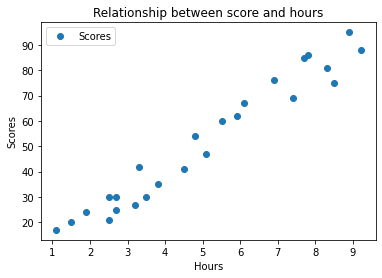

In [79]:
df.plot("Hours","Scores",style = "o")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Relationship between score and hours")
plt.legend()

In [80]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


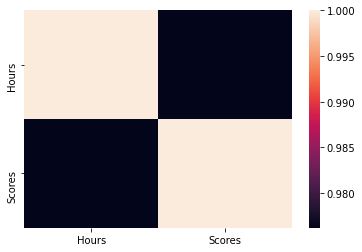

In [81]:
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

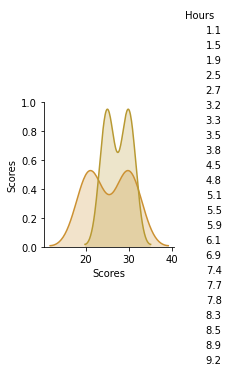

In [82]:
sns.pairplot(data = df,hue = "Hours")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

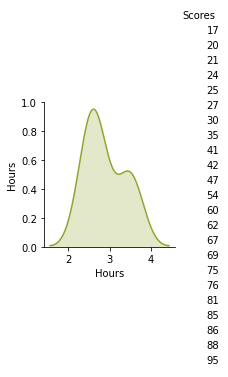

In [83]:
sns.pairplot(df,hue="Scores")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

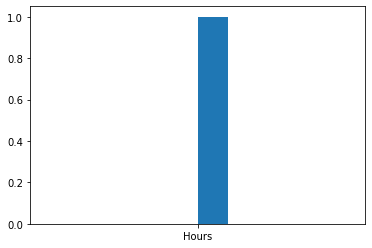

In [84]:
plt.plot(figsize=(12,8))
plt.hist("Hours")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

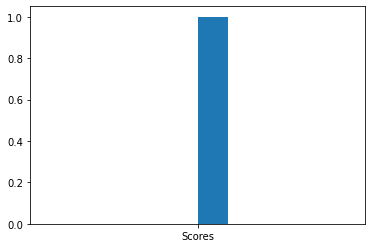

In [85]:
plt.hist("Scores")

### VISUALISING THE OUTLIERS 

{'whiskers': [<matplotlib.lines.Line2D at 0x11bbf3487c0>,
 'caps': [<matplotlib.lines.Line2D at 0x11bbf348e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x11bbf348460>,
 'medians': [<matplotlib.lines.Line2D at 0x11bbf356580>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bbf356880>,
 'means': []}

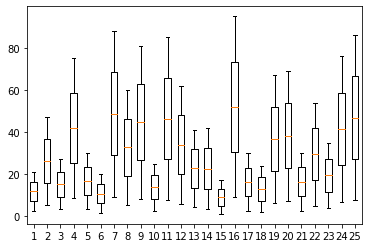

In [86]:
plt.boxplot(df)

(array([1, 2]), <a list of 2 Text major ticklabel objects>)

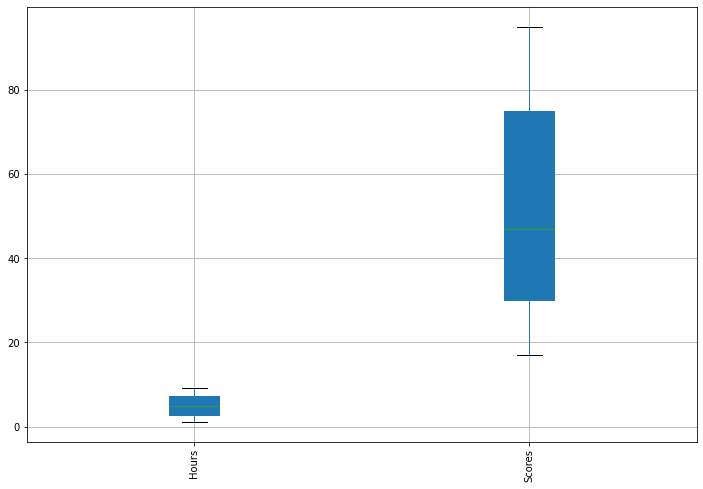

In [87]:
plt.subplots(figsize=(12,8))
df.boxplot(patch_artist = True)
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011BBFAD8BB0>,
      dtype=object)

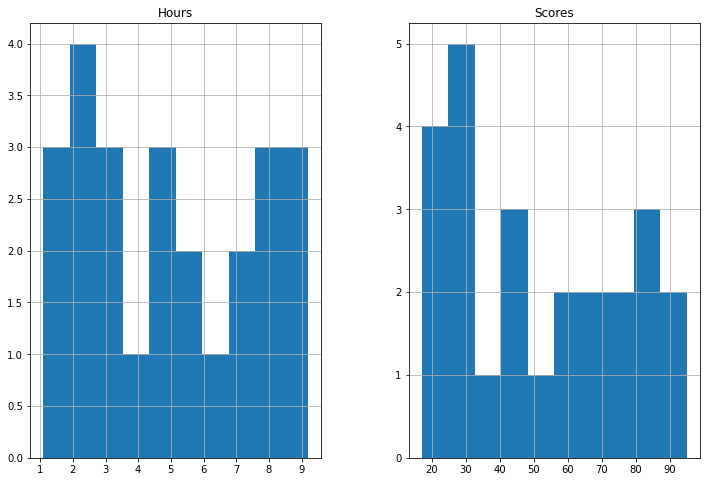

In [88]:
df.hist(figsize=(12,8))

### PREPARING THE DATA
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [89]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [90]:
x.shape,y.shape

((25, 1), (25,))

### DIVING THE DATA FOR TRAINING AND TESTING OF DATA
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [91]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y  = train_test_split(x,y,random_state = 56,test_size = 0.2)

In [92]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((20, 1), (5, 1), (20,), (5,))

### TRAING THE ALGORITHM FOR PREDICTION 
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [93]:
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(train_x,train_y)

LinearRegression()

In [94]:
lr.coef_

array([10.17148086])

In [95]:
lr.intercept_

1.2183178165035429

In [96]:
line = lr.coef_*x + lr.intercept_

In [97]:
line

array([[26.64701997],
       [53.09287022],
       [33.76705658],
       [87.67590515],
       [36.81850084],
       [16.47553911],
       [94.79594175],
       [57.16146256],
       [85.64160898],
       [28.68131615],
       [79.53872046],
       [61.23005491],
       [46.9899817 ],
       [34.78420466],
       [12.40694677],
       [91.74449749],
       [26.64701997],
       [20.54413146],
       [63.26435108],
       [76.4872762 ],
       [28.68131615],
       [50.04142596],
       [39.86994509],
       [71.40153577],
       [80.55586854]])

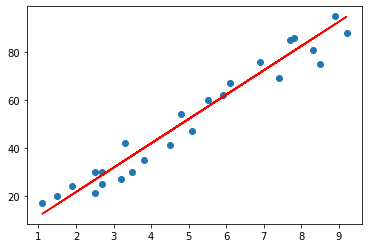

In [98]:
plt.scatter(x,y)
plt.plot(x,line,color = "red")

### MAKING PREDICTION 

In [99]:
y_pred = lr.predict(test_x)

In [100]:
y_pred

array([26.64701997, 76.4872762 , 39.86994509, 87.67590515, 63.26435108])

### COMPARING THE ACTUAL AND PREDICTED VALUE 

In [101]:
df = pd.DataFrame({"Actual": test_y ,"predcit": y_pred})

In [102]:
df

,Actual,predcit
0,30,26.647020
1,69,76.487276
2,35,39.869945
3,75,87.675905
4,67,63.264351


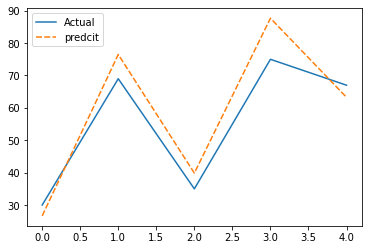

In [103]:
sns.lineplot(data = df)
plt.show()

### FOR OWN DATA(HOURS) PERCENTAGE OF STUDENT 

In [104]:
hour = 9.25
pred_own = lr.predict(test_x)
print("hour is = {}".format(hour))
print("percentage is ={}".format(pred_own[0]))

hour is = 9.25
percentage is =26.647019972945014


### AVERAGE VALUE AND ERROR IN PREDICTION USING LINEAR REGRESSION    # Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [105]:
from sklearn.metrics import mean_squared_error as mse 
mse(test_y,y_pred)

53.13035787401302

In [106]:
rmse = (np.sqrt(mse(test_y,y_pred)))
rmse

7.289057406414976

In [107]:
score = lr.score(test_x,y_pred)
score

1.0

In [108]:
score1= lr.score(train_x,train_y)
score1


0.963448950354653

## THANK YOU 